## Guía 1. Astrometría. Matías N. Ramos

## Los problemas se pueden correr de forma independiente

## Problema 16

El foco de este problema es usar el método de la función inversa para, a partir de ésta, poder generar un conjunto de valores que sigan la distribución de probabilidad proporcionada.

El código lo que hace es:

1 - Crea un conjunto de puntos equi-probables en (0,1) 

2 - Usando la distribución de probabilidad integrada a c/u de los puntos le asigno un tipo 
de galaxia

3 - Compara el resultado con la probabilidad teórica

In [1]:
# Llamo librerías necesarias para graficar y calcular
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')

In [2]:
plt.style.use('dark_background') # Lo pongo 2 veces porque aveces no anda bien

Crearé una lista con un loop y usaré como generador de N° aleatorios a un método de Numpy

In [3]:
Ngal = 10000 # Cantidad de galaxias
Nums = np.random.random(Ngal) # N° aleatorios en [0,1]
Gal = [] # Lista que rellenaré en el loop
# Relaciono Eliptica -->1, Espiral -->2, Enana -->3, Irregular -->4
ij = 0
while ij<len(Nums):
    if   0.0<Nums[ij] and Nums[ij]<0.4:
        Gal.append(1)
    elif 0.4<Nums[ij] and Nums[ij]<0.7:
        Gal.append(2)
    elif 0.7<Nums[ij] and Nums[ij]<0.9:
        Gal.append(3)
    else:
        Gal.append(4)
    ij = ij + 1

Básicamente lo que hice en el loop anterior fue usar la distribución de probabilidad integrada. La hice toda explicita porque creo que se entiende mejor en este caso.

In [4]:
# Calculo cuántas hay de cada tipo
Cant = (Gal.count(1), Gal.count(2), Gal.count(3), Gal.count(4))
Cant = np.array(Cant) # Tranformo a tipo Numpy para definir 'P' como:
P = Cant/Ngal # Porcentaje para cada tipo de galaxia
print('Las probabilidades son:', P)
# Compruebo cuál es la máxima diferencia en probabilidades (calculada vs teórica)
Max_dif = max(P[0]-0.4, P[1]-0.3, P[2]-0.2, P[3]-0.1)
print('Máxima diferencia porcentual:', round(100*Max_dif,3), '%')

Las probabilidades son: [0.3937 0.3028 0.2069 0.0966]
Máxima diferencia porcentual: 0.69 %


Concluyo que con una diferencia menor que 1% al valor teórico, logré reproducir una distribución aleatoria que siga la distribución de probabilidad proporcionada.

Notar que este criterio se me ocurrió y es uno que usaré en el resto de problemas. No es para nada formal pero es algo cualitativo que me permite comparar rápidamente.

## Problema 17

   El foco de este problema es poder definir un generador de números pseudo-aleatorios mediante el método de congruencia lineal. Son pseudo-aleatorios porque es una secuencia que se repite y están caracterizados por una semilla que puede generar toda la lista.

   El método de congruencia lineal se basa en usar la sig. ecuación:
X(n+1) = (a*X(n)+c) mod(M)
donde: a: multiplicador / c: incremento / m:módulo / x(n=0):semilla

   Este método crea una secuencia que, si le eligen bien los valores de sus parámetros, se repite justo en el elemento N° "m" (osea en el módulo) y cuando "m" es muy grande entonces se tiene que el generador es de buena calidad.
   
   El código lo que hace es definir funciones para generar N° aleatorios y otras útiles para calcular períodos y hacer más sencillo la graficación. Utilizo esas funciones para probar los parámetros que me proporcionan y luego otros que son más adecuados.

In [1]:
%matplotlib inline 
# Traigo este bloque para independizar este problema del anterior
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')
plt.style.use('dark_background') # Lo pongo 2 veces porque aveces no anda bien

In [2]:
# Defino una función para tener una sucesión de números aleatorios, otra para
# calcular el período de esa sucesión y una última para hacer la correlación
def RNG(a, c, M, x1, N):
    """ Devuelve números en [0,1] creados con el método de congruencia lineal
    
    Parameters 
    ----------
    a : .float
        Multiplicador 
    c : .float
        Incremento
    M : .float
        Módulo
    x1 : .float
        Valor inicial
    N : int
        N° de puntos a generar
        
    Returns
    -------
    np.sdarray
        Tupla numpy de números aleatorios en [0,1]
    
    """
    import numpy as np
    # Hago el loop generador
    ij = 0 
    Aux = x1 
    X = np.empty(N)
    while ij<N:
        x0 = Aux             
        Aux = (a*x0 + c) %M
        X[ij] = Aux          
        ij = ij + 1
    # Obtengo la distribución normalizada. i.e) limito al rango [0,1]
    X = X/max(X) 
    return X

def Period(X):
    """ Devuelve el período de la secuencia de números proporcionada
    
    Parameters
    ----------
    X : list
        Tupla de números aleatorios
        
    Returns
    -------
    .float
        Periodo de la secuencia
        
    """
    ij = 0
    Pers = [] # Arreglo para guardar los múltiplos del período. Ej: [256,512,etc] =>Per=256
    while ij<len(X):
        # La sig. condición no hace falta para el método de congruencia lineal. Sólo con que se
        # repita la semilla es suficiente. Pero la dejo como un recordatorio de que no todo
        # generador se repite cuando toca la semilla en la secuencia
        if X[ij-1] == X[0] and X[ij] == X[1]:
            Pers.append(ij-1) 
        ij = ij + 1
    # Calculo el período:
    if len(Pers)>1:
        Per = Pers[1]-Pers[0]
        return Per
    else:
        return print('Error, el período es mayor al valor de N ingresado')
    
def Corr(Sec):
    """ Devuelve los valores de X(n+1) y de X(n) dada la secuencia proporcionada
    
    Parameters
    ----------
    Sec : np.ndarray()
        Secuencia de valores numéricos
    
    Returns
    -------
    Corr[0] : np.ndarray()
        Valores de X(n)
    Corr[1] : np.ndarray()
        Valores de X(n+1)
   
    """
    import numpy as np
    # Relleno un arreglo con valores (X(n), X(n+1))
    Corr = np.empty([len(Sec),len(Sec)]) # Arreglo vacío a rellenar en loop
    ij = 0
    while ij<len(Sec)-1:
        Corr[ij,0] = Sec[ij]
        Corr[0,ij] = Sec[ij+1]
        ij = ij + 1
    return Corr[:,0], Corr[0,:]

In [3]:
# Uso el método para los valores de los argumentos de RNG que da la guía:
N = 512 
Nums = RNG(a=57, c=1, M=256, x1=10, N=N)
# De paso le calculo el período:
print('El período de la secuencia es:', Period(Nums))

El período de la secuencia es: 256


Noto que el período es exactamente igual a M, la teoría dice que ese es el valor máximo posible (pero no el mínimo)

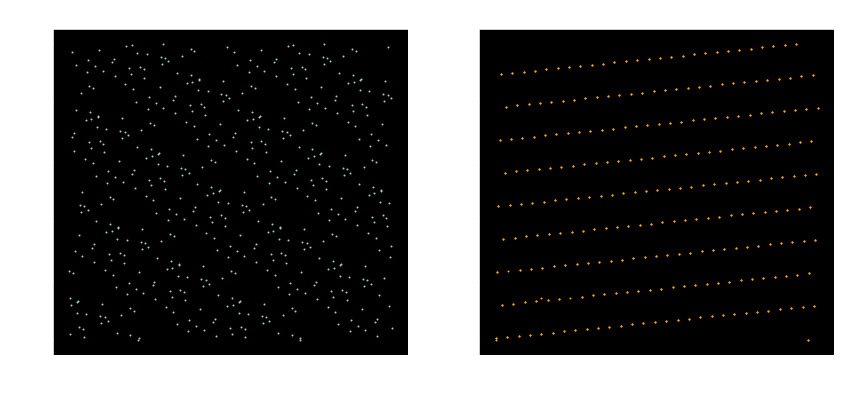

In [4]:
# Graficos de visualización y correlación
Cero_N = np.linspace(0, N, N) # Numeros enteros desde el cero hasta N

fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].scatter(Cero_N, Nums, s=1)
ax[1].scatter(Corr(Nums)[0], Corr(Nums)[1], color='orange', s=1)

ax[0].set_title('Visualización de números generados', fontsize=20)
ax[0].set_xlabel('N°', fontsize=20)
ax[0].set_ylabel('N° generado', fontsize=20);
ax[1].set_title('Correlación', fontsize=20)
ax[1].set_xlabel('Xn', fontsize=20)
ax[1].set_ylabel('Xn+1', fontsize=20);

Probé con distintos valores de N y lo que noté es que los puntos en el gráfico de correlación se superponen (porque se repite la secuencia) y el gráfico de vizualización de puntos se vuelve más denso pero por el hecho de que los valores del eje X aumentan, nada en especial

In [5]:
# Testeo el método con otros valores de a, c, M, y x1. 
# Uso los dados en Wikipedia, del libro 'Numerical recipes'
N2 = 5000
W_Nums = RNG(a=1664525, c=1013904223, M=2**(32), x1=1, N=N2)
# Calculo (ó intento calcular) el periodo
Period(W_Nums)

Error, el período es mayor al valor de N ingresado


Al elegir una buena combinación de constantes veo que el periodo no se puede calcular, lo que es algo que uno busca

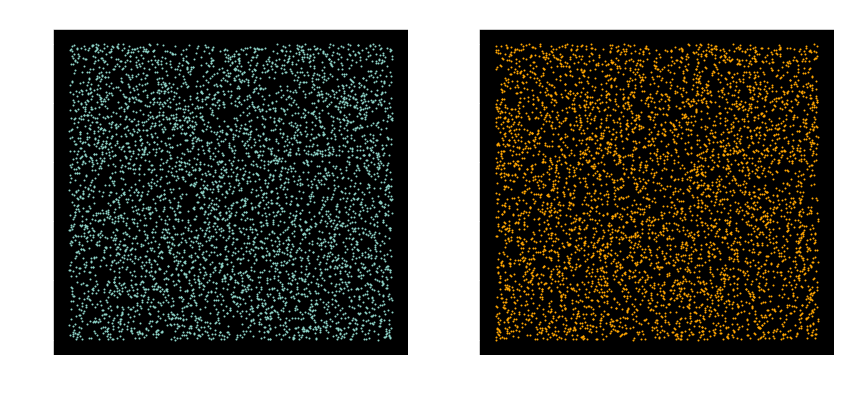

In [6]:
# Graficos de visualización y correlación
Cero_N = np.linspace(0, N2, N2) # Numeros enteros desde el cero hasta n_N

fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].scatter(Cero_N, W_Nums, s=1)
ax[1].scatter(Corr(W_Nums)[0], Corr(W_Nums)[1], color='orange', s=1)

ax[0].set_title('Visualización de números generados', fontsize=20)
ax[0].set_xlabel('N°', fontsize=20)
ax[0].set_ylabel('N° generado', fontsize=20);
ax[1].set_title('Correlación', fontsize=20)
ax[1].set_xlabel('Xn', fontsize=20)
ax[1].set_ylabel('Xn+1', fontsize=20);

Ahora si se puede comprobar (al menos cualitativamente) que no hay correlación y uno SI podría usar este generador para un trabajo serio.

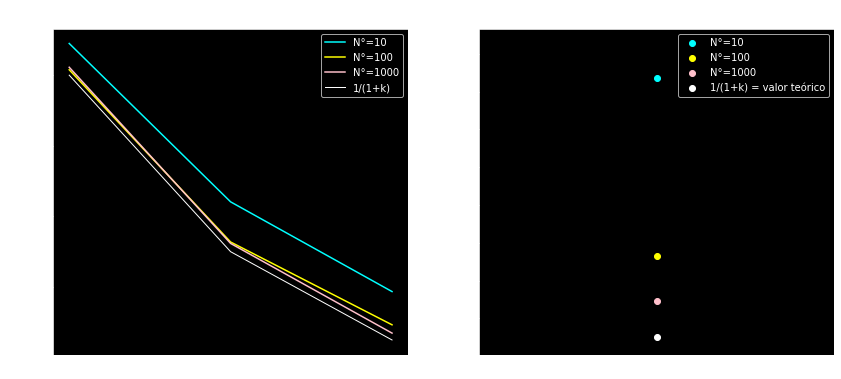

In [8]:
# Calculo momentos de orden k=1,3,7 para las distribuciones de N=10,100,1000 y comparo
# con 1/(1+k)
# Distribuciones:
D10   = RNG(a=1664525, c=1013904223, M=2**(32), x1=1, N=10) # Distribición para N=10
D100  = RNG(a=1664525, c=1013904223, M=2**(32), x1=1, N=100)
D1000 = RNG(a=1664525, c=1013904223, M=2**(32), x1=1, N=1000)

# Defino la función para calcular momentos de orden "k".
def Momento(a,k):
    """ Devuelve el momento del arreglo proporcionado
    
    Parameters
    ----------
    a : list
        Lista de valores numéricos a calcular los momentos
    k : int
        Orden del momento
        
    Returns
    -------
    momk : .float
        Momento de orden "k" para el arreglo proporcionado
    
    """
    import numpy as np
    momk = np.sum(a**k)/len(a)
    return momk

# Calculo momentos:
M10   = [Momento(D10,1)  , Momento(D10,3)  , Momento(D10,7)]
M100  = [Momento(D100,1) , Momento(D100,3) , Momento(D100,7)]
M1000 = [Momento(D1000,1), Momento(D1000,3), Momento(D1000,7)]
# Comparo con 1/(1+k), en gráficos
fig, ax = plt.subplots(1, 2, figsize = (14,6))

Mom = ('1er Momento', '3er Momento', '7mo Momento')
ax[0].plot(Mom, M10, color='cyan', label='N°=10')
ax[0].plot(Mom, M100, color='yellow', label='N°=100')
ax[0].plot(Mom, M1000, color='pink', label='N°=1000')
ax[0].plot(Mom, (1/2,1/4,1/8), color='white', label='1/(1+k)', lw=1)
# Sólo visualizo un momento para ver mejor la diferencia
ax[1].scatter(Mom[2], M10[2], color='cyan', label='N°=10')
ax[1].scatter(Mom[2], M100[2], color='yellow', label='N°=100')
ax[1].scatter(Mom[2], M1000[2], color='pink', label='N°=1000')
ax[1].scatter(Mom[2], (1/8), color='white', label='1/(1+k) = valor teórico')

ax[0].set_title('Visualización de momentos según N', fontsize=20)
ax[0].set_ylabel('Valor(N)', fontsize=20);
ax[0].legend()

ax[1].set_title('Zoom sólo al 7mo momento', fontsize=20)
ax[1].set_ylabel('Valor(N)', fontsize=20);
ax[1].legend();

Veo entonces que, al aumentar el número de puntos, los estimadores de los momentos se acercan cada vez más al valor teórico de los momentos de la distribucion uniforme continua en [0,1] el cual es mk = 1/(1+k)

 INCISO b)

Definiré unas funciones útiles primero:

In [14]:
# Desplazamientos
def Desplz(p,s):
    """ Devuelve un arreglo 2D que tiene desplazamientos en [-sqrt(2),sqrt(2)]
     p: Número de pasos en la caminata
     s: Semillas, array 1D con 2 elementos distintos
     return: array (NxN) que contiene la trayectoria """
    X = RNG(a=1664525, c=1013904223, M=2**(32), x1=s[0], N=p)
    Y = RNG(a=1664525, c=1013904223, M=2**(32), x1=s[1], N=p)
    # Escalo a [-sqrt(2), sqrt(2)]
    X = 2*np.sqrt(2)*X - np.sqrt(2)
    Y = 2*np.sqrt(2)*Y - np.sqrt(2)
    return X,Y
        
# Caminata
def Camin(Dx,Dy,o=(0,0)):
    """ Devuelve un arreglo (x,y) que tiene la trayectoria de una caminata
    Dx: Desplazamientos en el eje x (array 1D)
    Dy: Desplazamientos en el eje y (array 1D)
    o: Origen de la caminata (array 2D), default=(0,0)
    return: array que contiene la trayectoria"""
    Origen = o
    Camino = np.empty([len(Dx),len(Dx)]) # Contendrá el camino recorrido 
    ij = 0
    while ij<len(Dx):
        if ij==0:
            Camino[0][ij] = Origen[0]
            Camino[1][ij] = Origen[1]
        else:
            Camino[0][ij] =  Dx[ij] + Camino[0][ij-1]
            Camino[1][ij] =  Dy[ij] + Camino[1][ij-1]
        ij = ij + 1
    return Camino[:][0], Camino[:][1]

def semilla(a=0, b=999):
    """ Me devuelve un número entero entre a y b, elegidos aleatoriamente"""
    rango = np.linspace(a, b, b-a)
    s = np.random.choice(rango)
    return s

In [15]:
# Creo "Narr" arreglos de desplazamientos distintos con "p" pasos con las semillas "s"
Narr = 10
p = 1000
# "Narr" valores de semillas (sx,sy)
s = []
for ij in range(Narr):
    s.append( (semilla(), semilla()) )
Dx = [] # Desplazamientos en x
Dy = []
ij = 0
while ij<Narr:
    Dx.append( Desplz(p,s[ij])[0] )
    Dy.append( Desplz(p,s[ij])[1] )
    ij = ij + 1
# Creo las caminatas
ij = 0
Cam = []
while ij<Narr:
    Cam.append( Camin(Dx[ij],Dy[ij]) ) # Implicito un origen en (0,0)
    ij = ij + 1

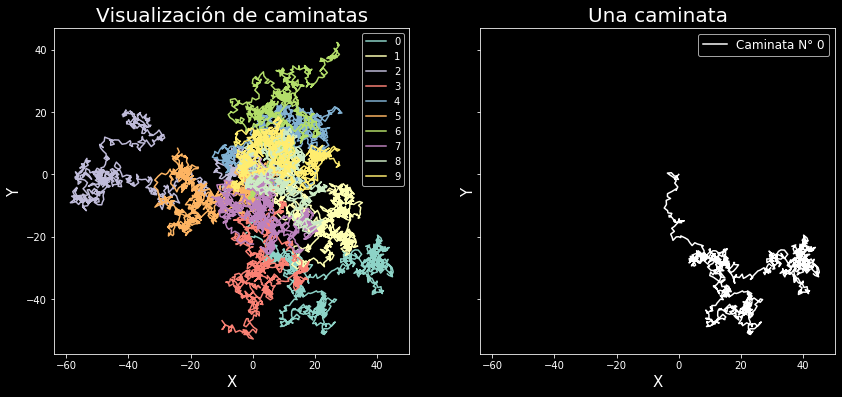

In [16]:
# Grafico las caminatas
fig, ax = plt.subplots(1, 2, figsize = (14,6), sharey=True, sharex=True)

ij = 0
while ij<Narr:
    ax[0].plot(Cam[ij][0], Cam[ij][1], label=ij) # Todas las caminatas a la vez
    ij = ij + 1
# Visualizo sólo una caminata
ax[1].plot(Cam[0][0], Cam[0][1], color='white', label='Caminata N° 0')

ax[0].set_title('Visualización de caminatas', fontsize=20)
ax[1].set_title('Una caminata', fontsize=20)
ax[0].set_xlabel('X', fontsize=15)
ax[0].set_ylabel('Y', fontsize=15)
ax[1].set_xlabel('X', fontsize=15)
ax[1].set_ylabel('Y', fontsize=15)
if Narr<11: # si hay muchas caminatas no vale la pena poner leyendas en la figura ax[0]
    ax[0].legend()
ax[1].legend(fontsize=12);

In [17]:
# Calculo la distancia promedio (distancia media) primero para c/u de las caminatas
# en función del paso
D_p = np.empty([Narr,p]) # (Número de caminata, Distancia en el paso)
ij = 0
while ij<Narr:
    ik = 0
    while ik<p:
        Dpx = Cam[ij][0][ik] # Dist. en X para la caminata N° ij y el paso N° ik
        Dpy = Cam[ij][1][ik]
        D_p[ij, ik] = np.sqrt(Dpx**2 + Dpy**2)
        ik = ik + 1
    ij = ij + 1
# Calculo las distancias promedios en función del paso
Dprom = np.empty(p)
ik = 0
while ik<p:
    Dprom[ik] = np.mean(D_p[:,ik]) # ik : N° de paso
    ik = ik + 1

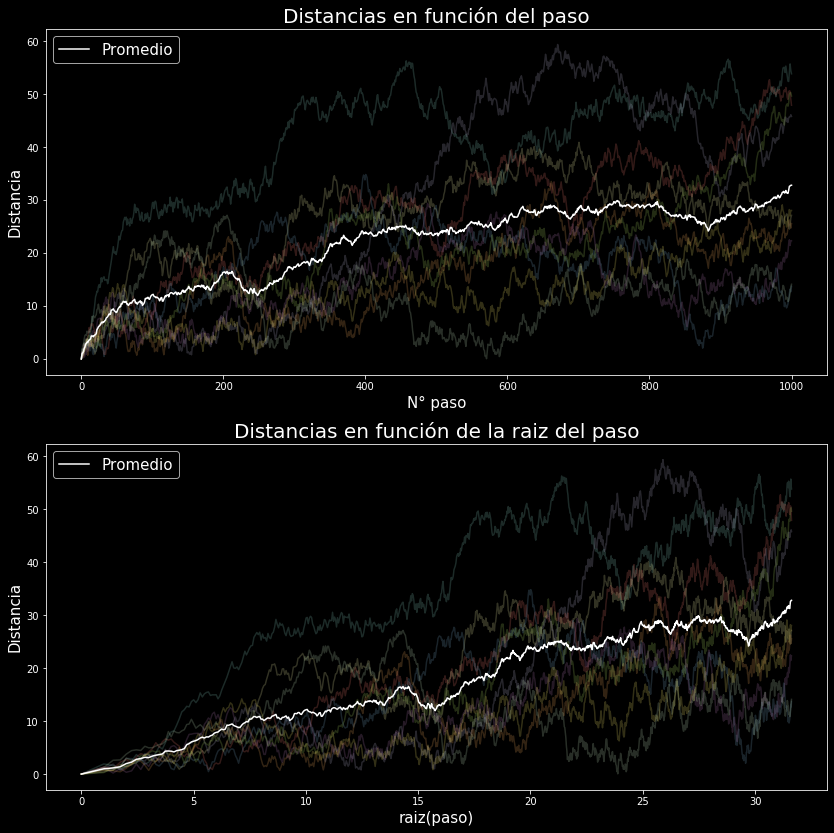

In [18]:
# Grafico las distancias para cada caminata y la curva que las promedia
fig, ax = plt.subplots(2, 1, figsize = (14,14), sharey=True)

steps = np.linspace(0,p,p)
ij = 0
while ij<Narr:
    ax[0].plot(steps, D_p[ij,:], alpha=0.2) # Distancias para c/u de las caminatas
    ax[1].plot(np.sqrt(steps), D_p[ij,:], alpha=0.2) 
    ij = ij + 1
ax[0].plot(steps, Dprom, color='white', label='Promedio') # Distancia promedio
ax[1].plot(np.sqrt(steps), Dprom, color='white', label='Promedio') 

ax[0].set_title('Distancias en función del paso', fontsize=20)
ax[0].set_xlabel('N° paso', fontsize=15)
ax[0].set_ylabel('Distancia', fontsize=15)
ax[0].legend(loc='upper left', fontsize=15)
ax[1].set_title('Distancias en función de la raiz del paso', fontsize=20)
ax[1].set_xlabel('raiz(paso)', fontsize=15)
ax[1].set_ylabel('Distancia', fontsize=15)
ax[1].legend(loc='upper left', fontsize=15);

plt.savefig('Dist.pdf')

El valor del promedio va evolucionando en función del paso y ese es el valor de espectación que me piden.

Me comentaron que incremente el número de caminatas y pasos para ver que, en el gráfico de
la distancia vs raiz de paso, el promedio tiende a ser una recta.

Eso lo comprobé pero no lo hago acá porque sería copiar y pegar muchisimo código para sólo cambiar el valor de "Narr" y "p". Lo que hago es adjuntar la figura que cree y tranquilamente se puede reproducir la tendencia modificando los valores más arriba.

Ver el archivo "Dist_paso.pdf"

# PROBLEMA 18

In [19]:
%matplotlib inline 
# Traigo este bloque para independizar este problema del anterior
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')
plt.style.use('dark_background') # Lo pongo 2 veces porque aveces no anda bien

INCISO a)

La variable aleatoria es "S" (suma de valores)

Espacio muestral: {2,3,4,5,6,7,8,9,10,11,12}

INCISO b)

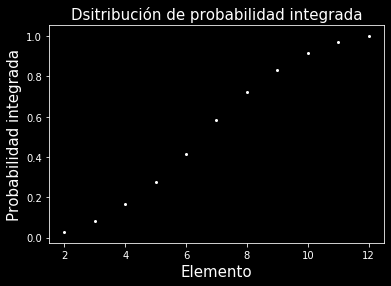

In [20]:
Elem = (2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12) # Elementos del espacio muestral
# Las probabilidades para cada elemento del espacio muestral, considerando que
# los dados son equiprobables, son:
Prob = (1/36, 2/36, 3/36, 4/36, 5/36, 6/36 ,5/36, 4/36, 3/36, 2/36, 1/36)
# Calculo la distribución de probabilidad integrada
ij = 0
Pint = np.empty(len(Elem)) 
aux = 0 # Auxiliar para la cuenta
while ij<len(Elem):
    aux = aux + Prob[ij]
    Pint[ij] = aux
    ij = ij + 1
plt.scatter(Elem, Pint, s=4, color='white')
plt.title('Dsitribución de probabilidad integrada', fontsize=15)
plt.ylabel('Probabilidad integrada', fontsize=15)
plt.xlabel('Elemento', fontsize=15);

INCISO c)

In [21]:
# Traigo la función RNG (por las duda que no se corran los otros problemas)
def RNG(a, c, M, x1, N):
    """ Devuelve números en [0,1] creados con el método de congruencia lineal.
    a: Multiplicador 
    c: Incremento
    M: Módulo
    x1: Valor inicial
    N: N° de puntos a generar
    return: Tupla numpy de números aleatorios en [0,1]"""
    # Hago el loop generador
    ij = 0 
    Aux = x1 
    X = np.empty(N)
    while ij<N:
        x0 = Aux             
        Aux = (a*x0 + c) %M
        X[ij] = Aux          
        ij = ij + 1
    # Obtengo la distribución normalizada. i.e) limito al rango [0,1]
    X = X/max(X) 
    return X

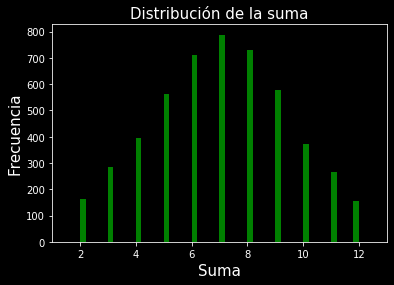

In [22]:
#  La uso para generar una distribución que siga la distribución de prob. acumulada
N = 5000 # Número de elementos generados
Ng = RNG(a=1664525, c=1013904223, M=2**(32), x1=1, N=N)
Muestra = []
# Caso cero (no se me ocurre cómo unificarlo con los otros casos)
ik = 0 
while ik<N:
        if Ng[ik]<Pint[0]:
            Muestra.append(Elem[0])
        ik = ik +1
# Otros casos
# Recorro Pint con ij y los números con ik
ij = 0
while ij<len(Elem)-1:
    ik = 0
    while ik<N:
        if Ng[ik]<Pint[ij+1] and Ng[ik]>Pint[ij]: 
            Muestra.append(Elem[ij+1])
        ik = ik + 1
    ij = ij + 1
    
# Grafico
plt.hist(Muestra, bins=50, color='green', label='Distribución experimental')
plt.title('Distribución de la suma', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15);
plt.xlabel('Suma', fontsize=15)
plt.xlim(1,13);

In [23]:
# Para comparar con la distribución teórica uso la misma idea que en el problema 16:
Cant = [] # Cantidad de veces que aparece cada evento
for ij in Elem:
    Cant.append(Muestra.count(ij))
Cant = np.array(Cant) # Tranformo a tipo Numpy para definir 'P' como:
P = Cant/N  # Porcentaje para cada elemento de la muestra

# Compruebo cuál es la máxima diferencia en probabilidades (calculada vs teórica)
Dif_e = [] # Diferencia por evento (entre porcentajes)
ij = 0
while ij<len(Elem):
    Dif_e.append( abs(P[ij]-Prob[ij]) )
    ij = ij + 1
Max_dif = max(Dif_e)
print('Máxima diferencia porcentual para 5000 tiradas es:', round(100*Max_dif,3), '%')

Máxima diferencia porcentual para 5000 tiradas es: 0.913 %


Una diferencia menor al 1% es bastante buena (supongo)

INCISO d)

Después de experimentar un poco con este inciso decidí hacer una función: "Dados()" para poder mostrar una curiosidad que encontré.

Descripción de lo que haré dentro de la creación de Dados(): Primero uso mi generador RNG() para generar datos para los 2 dados con resultados (1,2,3,4,5,6). Luego defino la variable Suma que me servirá para por ejemplo hacer el histograma y, por último, defino la variable "Max_dif" que me da la máxima separación porcentual a la distribución teórica.

In [24]:
def Dados(N):
    """ Devuelve la lista Suma (Dados(N)[0]) y la máxima diferencia porcentual (Dados(N)[1])
    N: N° de tiradas de los dados """
        # Creo arreglos con tiradas de dados
    Dado1 = RNG(a=1664525, c=1013904223, M=2**(32), x1=34, N=N)
    Dado1 = 1 + Dado1*(7-1) # Escalo a (0,7) (pero tiene números reales)
    Dado1 = np.trunc(Dado1) # Ésto lo tranforma en un arreglo con elementos (1,2,3,4,5,6)
    
    Dado2 = RNG(a=1664525, c=1013904223, M=2**(32), x1=43, N=N)
    Dado2 = 1 + Dado2*(7-1) 
    Dado2 = np.trunc(Dado2) 
        # Defino la variable Suma (como lista)
    Suma = []
    ij = 0
    while ij<N:
        Suma.append(Dado1[ij] + Dado2[ij])
        ij = ij +1
        
        # Comparación distribución teórica vs experimental
    Cant = [] # Cantidad de veces que aparece cada evento
    for ij in Elem:
        Cant.append(Suma.count(ij))
    Cant = np.array(Cant) # Tranformo a tipo Numpy para definir 'P2' como:
    P = Cant/N  # Porcentaje para cada elemento de la muestra

    # Compruebo cuál es la máxima diferencia en probabilidades (calculada vs teórica)
    Dif_e = [] # Diferencia por evento (entre porcentajes)
    ij = 0
    while ij<len(Elem):
        Dif_e.append( abs(P[ij]-Prob[ij]) )
        ij = ij + 1
    Max_dif = max(Dif_e)
    
    return Suma, Max_dif

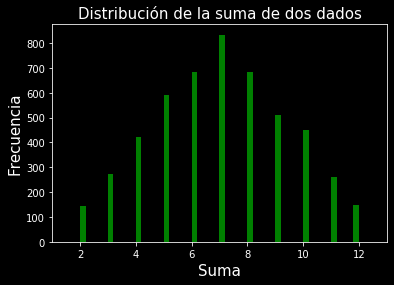

In [25]:
# Muestro una distribución para N=5000 como ejemplo
plt.hist(Dados(5000)[0], bins=50, color='green')
plt.title('Distribución de la suma de dos dados', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15);
plt.xlabel('Suma', fontsize=15)
plt.xlim(1,13);

In [26]:
# Su diferencia porcentual vs. la distribución teórica es:
Max_dif5000 = Dados(5000)[1]
print('Máxima diferencia porcentual:', round(100*Max_dif5000,3), '%')

Máxima diferencia porcentual: 0.911 %


Ahora, la curiosidad es que esta máxima diferencia porcentual NO DECRECE MONOTONAMENTE cuando incremento N. Correr los siguientes bloques (tardan aprox 30s)

In [27]:
NP = np.linspace(1000, 100000, 100) # Auxiliar para rellenar "Range"
Range = []
for ij in range(100): 
    Range.append(int(NP[ij]))
Dif_prob = []
ij = 0
while ij<len(Range):
    Dif_prob.append(100*Dados(Range[ij])[1])
    ij = ij + 1

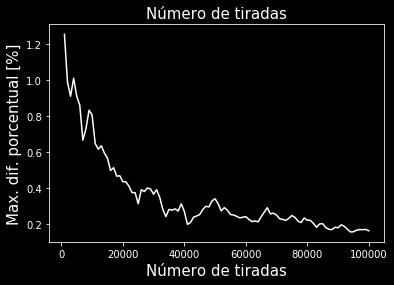

In [28]:
# Gráfico:
plt.plot(Range, Dif_prob, color='white')
plt.title('Número de tiradas', fontsize=15)
plt.ylabel('Max. dif. porcentual [%]', fontsize=15)
plt.xlabel('Número de tiradas', fontsize=15);


Me pareció curioso porque cuando probé con N=5000 y luego con N=10000 noté ese fenómeno. Lo bueno es que la tendencia si es a disminuir